In [1]:
import numpy as np
import pandas as pd
import yfinance
import pandas_ta as ta

# Data
- Open
- High
- Low
- Close
- Volume
- PE
- PS
- EV_EBITDA
- Put Call Ratio
- tbill - 13
- tbond - 10
- tbond - 30
- crude oil
- gold
- fx cad
- fx jpy
- fx eur
- fx cny
- .

In [2]:
ticker = 'MSFT'
start = '2004-01-02'
end = {
    'AAPL': '2021-09-21',
    'MSFT': '2020-09-29',
    'AMZN': '2020-09-29',
    'SPY': "2023-02-20"
}
def get_yfdata(yf_ticker, cols):
    yf_data = yfinance.download(yf_ticker, start = start, end=end[ticker])
    yf_data = yf_data.rename(columns={'Open':'open', 'High': 'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})
    yf_data.drop(columns=['Adj Close'])
    print(yf_ticker, yf_data.shape)
    return yf_data[cols]

In [3]:
# * Tech & Macro
df = get_yfdata(ticker, ['open', 'high', 'low', 'close','volume'])
close_cols = ['^IRX','^TNX', '^TYX', 'CL=F', 'GC=F', 'CAD=X', 'JPY=X', 'EUR=X', 'CNY=X']
for col in close_cols:
    df = df.join(get_yfdata(col,'close').rename(col), how='outer')
df.head()

[*********************100%***********************]  1 of 1 completed
MSFT (4214, 6)
[*********************100%***********************]  1 of 1 completed
^IRX (4208, 6)
[*********************100%***********************]  1 of 1 completed
^TNX (4208, 6)
[*********************100%***********************]  1 of 1 completed
^TYX (4208, 6)
[*********************100%***********************]  1 of 1 completed
CL=F (4208, 6)
[*********************100%***********************]  1 of 1 completed
GC=F (4204, 6)
[*********************100%***********************]  1 of 1 completed
CAD=X (4353, 6)
[*********************100%***********************]  1 of 1 completed
JPY=X (4338, 6)
[*********************100%***********************]  1 of 1 completed
EUR=X (4338, 6)
[*********************100%***********************]  1 of 1 completed
CNY=X (4352, 6)


,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,CAD=X,JPY=X,EUR=X,CNY=X
Date,,,,,,,,,,,,,,
2004-01-02,27.580000,27.770000,27.330000,27.450001,44487700.0,0.902,4.373,5.176,NaN,NaN,1.2925,106.910004,0.79479,8.266900
2004-01-05,27.730000,28.180000,27.719999,28.139999,67333700.0,0.902,4.387,5.175,33.779999,424.399994,1.2812,106.239998,0.78821,8.267000
2004-01-06,28.190001,28.280001,28.070000,28.240000,46950800.0,0.901,4.277,5.106,33.700001,422.799988,1.2866,106.230003,0.78610,8.267100
2004-01-07,28.170000,28.309999,28.010000,28.209999,54298200.0,0.886,4.246,5.084,33.619999,421.899994,1.2895,106.180000,0.79108,8.267201
2004-01-08,28.389999,28.480000,28.000000,28.160000,58810800.0,0.847,4.249,5.080,33.980000,424.000000,1.2787,106.169998,0.78278,8.267201


In [4]:
# * Value
ratios = [('EV EBITDA Ratio','EV_EBITDA'),('PE Ratio', 'PE'),('PS Ratio', 'PS'),('Put Call Ratio', 'PutCall')]
for ratio in ratios:
    x = pd.read_csv(f'data/raw/{ticker} {ratio[0]}.csv', index_col=0)
    x = x.rename(columns={x.columns[0]: ratio[1]})
    x.index = pd.to_datetime(x.index)
    df = df.join(x, how='outer')
df.head()

,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,CAD=X,JPY=X,EUR=X,CNY=X,EV_EBITDA,PE,PS,PutCall
2002-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.8147,42.1635,13.4297,1.9567
2002-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.6848,43.5409,13.8684,0.2157
2002-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.5537,43.3333,13.8023,1.5566
2002-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.4186,43.1195,13.7341,1.4556
2002-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.7444,43.6352,13.8984,1.2844


In [5]:
df.tail()

,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,CAD=X,JPY=X,EUR=X,CNY=X,EV_EBITDA,PE,PS,PutCall
2023-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6126,27.5442,9.2332,0.7041
2023-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.3342,27.1370,9.0967,0.9081
2023-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.7320,27.7188,9.2917,0.7065
2023-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.2446,28.4688,9.5431,1.0767
2023-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.2446,NaN,NaN,NaN


In [6]:
df0 = pd.read_csv("data/raw/compiled_balance_sheet_data.csv")
df1 = pd.read_csv("data/raw/compiled_cash_flow_data.csv")
df2 = pd.read_csv("data/raw/compiled_income_statement_data.csv")

C:\Users\saxen\AppData\Local\Temp\ipykernel_12568\2915973316.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv("data/raw/compiled_balance_sheet_data.csv")


In [7]:
df0 = df0.iloc[:,1:]
df1 = df1.iloc[:,4:]
df2 = df2.iloc[:,4:]
df_X = pd.concat([df0,df1, df2], axis=1)
# df_X = pd.read_csv("restructured_fundamental_data/fundamental_pca.csv")
df_X

,ticker,time,currency_symbol,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,...,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments
0,AAPL,2021-09-21T16:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
1,AAPL,2021-09-21T15:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
2,AAPL,2021-09-21T14:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
3,AAPL,2021-09-21T13:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
4,AAPL,2021-09-21T12:00:00Z,USD,3.298400e+11,0.0,0.0,1.364100e+10,2.655600e+11,6.428000e+10,0.0,...,0.0,2.625000e+09,8.143400e+10,1.112900e+10,4.617900e+10,243000000.0,0.0,2.174400e+10,2.174400e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579228,ZTS,2013-02-01T14:00:00Z,USD,6.262000e+09,868000000.0,0.0,3.020000e+08,2.221000e+09,4.026000e+09,0.0,...,0.0,8.400000e+07,1.176000e+09,5.900000e+08,4.330000e+08,-79000000.0,0.0,0.000000e+00,2.740000e+08,0.0
3579229,ZTS,2013-02-01T13:00:00Z,USD,6.262000e+09,868000000.0,0.0,3.020000e+08,2.221000e+09,4.026000e+09,0.0,...,0.0,8.400000e+07,1.176000e+09,5.900000e+08,4.330000e+08,-79000000.0,0.0,0.000000e+00,2.740000e+08,0.0
3579230,ZTS,2013-02-01T12:00:00Z,USD,6.262000e+09,868000000.0,0.0,3.020000e+08,2.221000e+09,4.026000e+09,0.0,...,0.0,8.400000e+07,1.176000e+09,5.900000e+08,4.330000e+08,-79000000.0,0.0,0.000000e+00,2.740000e+08,0.0
3579231,ZTS,2013-02-01T11:00:00Z,USD,6.262000e+09,868000000.0,0.0,3.020000e+08,2.221000e+09,4.026000e+09,0.0,...,0.0,8.400000e+07,1.176000e+09,5.900000e+08,4.330000e+08,-79000000.0,0.0,0.000000e+00,2.740000e+08,0.0


In [8]:
df_f = df_X.copy()

In [9]:
fund_features = ['ticker','time','nonCurrentAssetsTotal','totalLiab','netDebt','totalAssets','intangibleAssets']
add_df = df_X.groupby(['ticker']).get_group(ticker.upper()).sort_values('time').reset_index(drop=True).iloc[1:,:]
add_df = add_df[fund_features]
add_df['time'] = add_df['time'].str[:10]
add_df = add_df.groupby(['time']).first().sort_values('time').reset_index()

In [10]:
add_df.index = pd.to_datetime(add_df.time)
add_df = add_df.drop(columns=['time','ticker'])

In [11]:
fund_features = fund_features[2:]
val_features = [r[1] for r in ratios]
macro_features = close_cols
print(fund_features)
print(val_features)
print(macro_features)

['nonCurrentAssetsTotal', 'totalLiab', 'netDebt', 'totalAssets', 'intangibleAssets']
['EV_EBITDA', 'PE', 'PS', 'PutCall']
['^IRX', '^TNX', '^TYX', 'CL=F', 'GC=F', 'CAD=X', 'JPY=X', 'EUR=X', 'CNY=X']


In [88]:
add_df

,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets
time,,,,,
2004-01-02,3.412240e+08,3.198140e+09,8.473820e+08,2.162033e+09,69639000.0
2004-01-05,3.412240e+08,3.198140e+09,8.473820e+08,2.162033e+09,69639000.0
2004-01-06,3.412240e+08,3.198140e+09,8.473820e+08,2.162033e+09,69639000.0
2004-01-07,3.412240e+08,3.198140e+09,8.473820e+08,2.162033e+09,69639000.0
2004-01-08,3.412240e+08,3.198140e+09,8.473820e+08,2.162033e+09,69639000.0
...,...,...,...,...,...
2020-09-23,1.474060e+11,1.845860e+11,3.846000e+10,2.583140e+11,0.0
2020-09-24,1.474060e+11,1.845860e+11,3.846000e+10,2.583140e+11,0.0
2020-09-25,1.474060e+11,1.845860e+11,3.846000e+10,2.583140e+11,0.0


In [12]:

df = df.join(add_df, how='outer')
df.iloc[1000:]

,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,...,CNY=X,EV_EBITDA,PE,PS,PutCall,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets
2005-11-28,27.790001,27.850000,27.530001,27.750000,57517200.0,3.830,4.406,4.627,57.360001,498.299988,...,8.0785,15.9394,20.9901,7.4264,0.3666,2.163100e+10,2.313500e+10,-2.974000e+09,7.146200e+10,4.006000e+09
2005-11-29,27.790001,27.790001,27.600000,27.680000,62220400.0,3.887,4.482,4.690,56.500000,499.100006,...,8.0756,15.8929,20.9371,7.4077,0.5477,2.163100e+10,2.313500e+10,-2.974000e+09,7.146200e+10,4.006000e+09
2005-11-30,27.680000,27.770000,27.629999,27.680000,55904700.0,3.857,4.500,4.703,57.320000,494.600006,...,8.0756,15.8929,20.9371,7.4077,0.2886,2.163100e+10,2.313500e+10,-2.974000e+09,7.146200e+10,4.006000e+09
2005-12-01,27.730000,28.100000,27.730000,27.889999,61006100.0,3.877,4.521,4.726,58.470001,502.500000,...,8.0758,16.0325,21.0960,7.4639,0.2154,2.163100e+10,2.313500e+10,-2.974000e+09,7.146200e+10,4.006000e+09
2005-12-02,27.820000,28.100000,27.790001,28.010000,42319600.0,3.892,4.519,4.717,59.320000,503.299988,...,8.0758,16.1122,21.1867,7.4960,0.3019,2.163100e+10,2.313500e+10,-2.974000e+09,7.146200e+10,4.006000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.6126,27.5442,9.2332,0.7041,NaN,NaN,NaN,NaN,NaN
2023-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.3342,27.1370,9.0967,0.9081,NaN,NaN,NaN,NaN,NaN
2023-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.7320,27.7188,9.2917,0.7065,NaN,NaN,NaN,NaN,NaN
2023-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.2446,28.4688,9.5431,1.0767,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isna().sum()

open                     1276
high                     1276
low                      1276
close                    1276
volume                   1276
^IRX                     1282
^TNX                     1282
^TYX                     1282
CL=F                     1282
GC=F                     1286
CAD=X                    1137
JPY=X                    1152
EUR=X                    1152
CNY=X                    1138
EV_EBITDA                 153
PE                        154
PS                        154
PutCall                   154
nonCurrentAssetsTotal    1276
totalLiab                1276
netDebt                  1276
totalAssets              1276
intangibleAssets         1276
dtype: int64

In [14]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', '^IRX', '^TNX', '^TYX',
       'CL=F', 'GC=F', 'CAD=X', 'JPY=X', 'EUR=X', 'CNY=X', 'EV_EBITDA', 'PE',
       'PS', 'PutCall', 'nonCurrentAssetsTotal', 'totalLiab', 'netDebt',
       'totalAssets', 'intangibleAssets'],
      dtype='object')

In [15]:
# preprocessing
df['!close_pct'] = df['close'].pct_change()
df['!open'] = df['open']
df['!close'] = df['close']
df['!high'] = df['high']
df['!low'] = df['low']
from scipy.stats.mstats import gmean
for col in df.columns:
    if '!' not in col and col not in fund_features:
        df[col] = df[col].pct_change()
        df[col] = df[col].apply(lambda x: x+1).rolling(window=5, min_periods=1).apply(gmean).apply(lambda x: x-1)
df = df.dropna()
print(df.shape)
df.head()

(4191, 28)


,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,...,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets,!close_pct,!open,!close,!high,!low
2004-01-12,-0.000433,-0.003214,-0.002684,-0.004084,-0.036724,-0.012504,-0.014260,-0.008011,0.005505,0.000894,...,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,-0.003254,27.670000,27.570000,27.730000,27.350000
2004-01-13,-0.004582,-0.004568,-0.005839,-0.005804,0.018889,-0.008811,-0.011925,-0.006588,0.004295,0.000425,...,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,-0.005078,27.549999,27.430000,27.639999,27.260000
2004-01-14,-0.004658,-0.004131,-0.003886,-0.003642,-0.041594,-0.006402,-0.012558,-0.008076,0.005181,-0.000095,...,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,0.009843,27.520000,27.700001,27.730000,27.469999
2004-01-15,-0.005989,-0.005395,-0.004178,-0.004443,-0.001045,0.001178,-0.013442,-0.008775,-0.003199,-0.007469,...,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,-0.005776,27.549999,27.540001,27.719999,27.420000
2004-01-16,-0.002294,-0.001286,-0.000435,0.001082,-0.009408,0.004706,-0.003549,-0.003610,0.004391,-0.009416,...,2.353700e+10,1.659400e+10,-6.149000e+09,8.593700e+10,3.455000e+09,0.009804,27.709999,27.809999,27.879999,27.530001


In [16]:
df.tail()

,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,...,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets,!close_pct,!open,!close,!high,!low
2020-09-22,-0.003245,-0.001607,-0.004732,-0.001306,0.089599,-0.025243,-0.004458,-0.002527,0.006803,-0.005970,...,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,0.024094,205.059998,207.419998,208.100006,202.080002
2020-09-23,-0.002596,-0.002433,-0.004547,-0.004389,0.031898,-0.025243,-0.003223,-0.003059,-0.001148,-0.010450,...,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,-0.032928,207.899994,200.589996,208.100006,200.029999
2020-09-24,-0.000200,0.001211,-0.000761,0.000276,-0.017091,0.018152,-0.005319,-0.003950,-0.003243,-0.007504,...,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,0.012962,199.850006,203.190002,205.570007,199.199997
2020-09-25,0.000739,0.005238,0.006330,0.007308,-0.118237,0.016326,-0.010296,-0.006696,-0.004219,-0.009864,...,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,0.022787,203.550003,207.820007,209.039993,202.539993
2020-09-28,0.013515,0.009544,0.011622,0.006722,-0.042850,0.019245,-0.002396,-0.000561,0.006479,-0.003006,...,1.193960e+11,1.830070e+11,5.742200e+10,3.013110e+11,7.038000e+09,0.007795,210.880005,209.440002,212.570007,208.059998


In [17]:
from utils.plot_utils import *
# plot_cols(df, ticker)

In [18]:
plot_col_histogram(df, ticker)

In [17]:
df_train = df.iloc[:int(0.8*df.shape[0]),:]
df_val = df.iloc[int(0.8*df.shape[0]):int(0.9*df.shape[0]),:]
df_test = df.iloc[int(0.9*df.shape[0]):,:]
df_train.shape

(3352, 28)

In [18]:
from utils.preprocessing_utils import *

In [19]:
df_train_norm, df_val_norm, df_test_norm, scalers = standardize_and_scale(df_train, df_val, df_test)
df_train_norm.head()

{'open': RobustScaler(), 'high': RobustScaler(), 'low': RobustScaler(), 'close': RobustScaler(), 'volume': RobustScaler(), '^IRX': RobustScaler(), '^TNX': RobustScaler(), '^TYX': RobustScaler(), 'CL=F': RobustScaler(), 'GC=F': RobustScaler(), 'CAD=X': RobustScaler(), 'JPY=X': RobustScaler(), 'EUR=X': RobustScaler(), 'CNY=X': RobustScaler(), 'EV_EBITDA': RobustScaler(), 'PE': RobustScaler(), 'PS': RobustScaler(), 'PutCall': RobustScaler(), 'nonCurrentAssetsTotal': RobustScaler(), 'totalLiab': RobustScaler(), 'netDebt': RobustScaler(), 'totalAssets': RobustScaler(), 'intangibleAssets': RobustScaler()}


,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,...,nonCurrentAssetsTotal,totalLiab,netDebt,totalAssets,intangibleAssets,!close_pct,!open,!close,!high,!low
2004-01-12,-0.119961,-0.527318,-0.451892,-0.628513,-0.341970,-0.466436,-1.391951,-1.032777,0.434984,0.041880,...,-0.298237,-0.615047,-0.322239,-0.07587,0.218073,-0.003254,27.670000,27.570000,27.730000,27.350000
2004-01-13,-0.714277,-0.725372,-0.913436,-0.869123,0.192785,-0.329568,-1.156512,-0.839732,0.329407,-0.030721,...,-0.298237,-0.615047,-0.322239,-0.07587,0.218073,-0.005078,27.549999,27.430000,27.639999,27.260000
2004-01-14,-0.725105,-0.661534,-0.627714,-0.566616,-0.388794,-0.240287,-1.220387,-1.041527,0.406741,-0.111350,...,-0.298237,-0.615047,-0.322239,-0.07587,0.218073,0.009843,27.520000,27.700001,27.730000,27.469999
2004-01-15,-0.915726,-0.846437,-0.670394,-0.678661,0.001102,0.040637,-1.309476,-1.136326,-0.324894,-1.254365,...,-0.298237,-0.615047,-0.322239,-0.07587,0.218073,-0.005776,27.549999,27.540001,27.719999,27.420000
2004-01-16,-0.386468,-0.245157,-0.122962,0.094620,-0.079307,0.171399,-0.312150,-0.435631,0.337803,-1.556075,...,-0.298237,-0.615047,-0.322239,-0.07587,0.218073,0.009804,27.709999,27.809999,27.879999,27.530001


(3352, 28)
(3352, 5) Index(['nonCurrentAssetsTotal', 'totalLiab', 'netDebt', 'totalAssets',
       'intangibleAssets'],
      dtype='object')
(3352, 2)
[0.85643096 0.11776625]


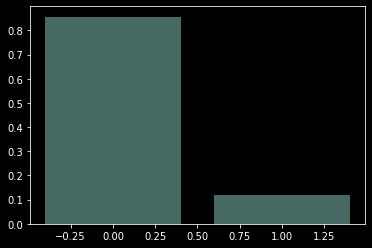

,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,...,netDebt,totalAssets,intangibleAssets,!close_pct,!open,!close,!high,!low,fund_pca*_0,fund_pca*_1
2004-01-12,-0.119961,-0.527318,-0.451892,-0.628513,-0.341970,-0.466436,-1.391951,-1.032777,0.434984,0.041880,...,-0.322239,-0.07587,0.218073,-0.003254,27.670000,27.570000,27.730000,27.350000,-1.065519,-0.751251
2004-01-13,-0.714277,-0.725372,-0.913436,-0.869123,0.192785,-0.329568,-1.156512,-0.839732,0.329407,-0.030721,...,-0.322239,-0.07587,0.218073,-0.005078,27.549999,27.430000,27.639999,27.260000,-1.065519,-0.751251
2004-01-14,-0.725105,-0.661534,-0.627714,-0.566616,-0.388794,-0.240287,-1.220387,-1.041527,0.406741,-0.111350,...,-0.322239,-0.07587,0.218073,0.009843,27.520000,27.700001,27.730000,27.469999,-1.065519,-0.751251
2004-01-15,-0.915726,-0.846437,-0.670394,-0.678661,0.001102,0.040637,-1.309476,-1.136326,-0.324894,-1.254365,...,-0.322239,-0.07587,0.218073,-0.005776,27.549999,27.540001,27.719999,27.420000,-1.065519,-0.751251
2004-01-16,-0.386468,-0.245157,-0.122962,0.094620,-0.079307,0.171399,-0.312150,-0.435631,0.337803,-1.556075,...,-0.322239,-0.07587,0.218073,0.009804,27.709999,27.809999,27.879999,27.530001,-1.065519,-0.751251


In [21]:
df_train_pca, df_val_pca, df_test_pca = add_PCA(fund_features, df_train_norm, df_val_norm, df_test_norm, n_components=2, prefix='fund_', append=True)
df_train_pca.head()

(3352, 30)
(3352, 4) Index(['EV_EBITDA', 'PE', 'PS', 'PutCall'], dtype='object')
(3352, 4)
[0.73384784 0.20814    0.04731935 0.01069281]


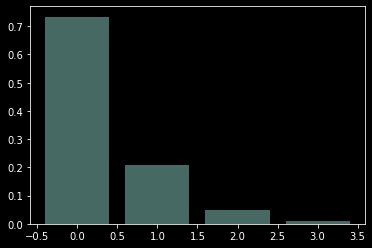

,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,...,!open,!close,!high,!low,fund_pca*_0,fund_pca*_1,val_pca*_0,val_pca*_1,val_pca*_2,val_pca*_3
2004-01-12,-0.119961,-0.527318,-0.451892,-0.628513,-0.341970,-0.466436,-1.391951,-1.032777,0.434984,0.041880,...,27.670000,27.570000,27.730000,27.350000,-1.065519,-0.751251,1.008246,0.746725,0.033014,0.004747
2004-01-13,-0.714277,-0.725372,-0.913436,-0.869123,0.192785,-0.329568,-1.156512,-0.839732,0.329407,-0.030721,...,27.549999,27.430000,27.639999,27.260000,-1.065519,-0.751251,1.347722,-0.069381,0.042406,0.013183
2004-01-14,-0.725105,-0.661534,-0.627714,-0.566616,-0.388794,-0.240287,-1.220387,-1.041527,0.406741,-0.111350,...,27.520000,27.700001,27.730000,27.469999,-1.065519,-0.751251,0.844113,-0.021627,0.030916,0.003548
2004-01-15,-0.915726,-0.846437,-0.670394,-0.678661,0.001102,0.040637,-1.309476,-1.136326,-0.324894,-1.254365,...,27.549999,27.540001,27.719999,27.420000,-1.065519,-0.751251,0.958124,-0.972631,0.035207,0.008649
2004-01-16,-0.386468,-0.245157,-0.122962,0.094620,-0.079307,0.171399,-0.312150,-0.435631,0.337803,-1.556075,...,27.709999,27.809999,27.879999,27.530001,-1.065519,-0.751251,-0.248852,0.174779,0.004881,-0.017294


In [25]:
df_train_pca, df_val_pca, df_test_pca = add_PCA(val_features, df_train_norm, df_val_norm, df_test_norm, n_components=None, prefix='val_', append=True)
df_train_pca.head()

(3352, 34)
(3352, 9) Index(['^IRX', '^TNX', '^TYX', 'CL=F', 'GC=F', 'CAD=X', 'JPY=X', 'EUR=X',
       'CNY=X'],
      dtype='object')
(3352, 9)
[0.55267725 0.20559339 0.08781548 0.06510132 0.02832047 0.02450433
 0.01812244 0.0155716  0.00229371]


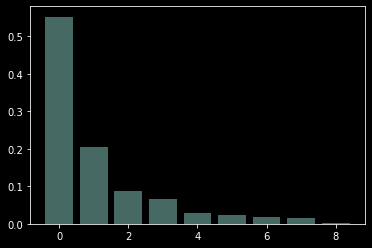

,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,...,val_pca*_3,macro_pca*_0,macro_pca*_1,macro_pca*_2,macro_pca*_3,macro_pca*_4,macro_pca*_5,macro_pca*_6,macro_pca*_7,macro_pca_8
2004-01-12,-0.119961,-0.527318,-0.451892,-0.628513,-0.341970,-0.466436,-1.391951,-1.032777,0.434984,0.041880,...,0.004747,-0.661720,-0.134131,-1.081964,0.815968,-1.161509,-0.122565,-0.483118,0.075025,0.241727
2004-01-13,-0.714277,-0.725372,-0.913436,-0.869123,0.192785,-0.329568,-1.156512,-0.839732,0.329407,-0.030721,...,0.013183,-0.514593,-0.054947,-0.794115,1.002438,-0.913034,0.018001,-0.585225,-0.367946,0.175500
2004-01-14,-0.725105,-0.661534,-0.627714,-0.566616,-0.388794,-0.240287,-1.220387,-1.041527,0.406741,-0.111350,...,0.003548,-0.431124,-0.133943,-1.157434,0.530151,-0.936743,-0.300490,-0.511090,0.127176,0.122945
2004-01-15,-0.915726,-0.846437,-0.670394,-0.678661,0.001102,0.040637,-1.309476,-1.136326,-0.324894,-1.254365,...,0.008649,-0.143298,-0.392756,-1.849380,-1.070726,-0.680877,-0.319983,-0.851079,-0.011459,0.190485
2004-01-16,-0.386468,-0.245157,-0.122962,0.094620,-0.079307,0.171399,-0.312150,-0.435631,0.337803,-1.556075,...,-0.017294,0.079250,-0.501791,-0.867225,-2.180816,-0.396449,-1.589649,-0.683298,-0.197131,0.012805


In [27]:
df_train_pca, df_val_pca, df_test_pca = add_PCA(macro_features, df_train_norm, df_val_norm, df_test_norm, n_components=None, prefix='macro_', append=True)
df_train_pca.head()

(3352, 43)
(3352, 5) Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
(3352, 5)
[0.78120665 0.17544902 0.02973859 0.0090385  0.00456724]


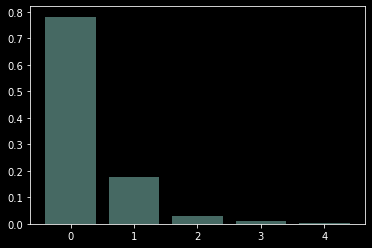

,open,high,low,close,volume,^IRX,^TNX,^TYX,CL=F,GC=F,...,macro_pca*_4,macro_pca*_5,macro_pca*_6,macro_pca*_7,macro_pca_8,tech_pca*_0,tech_pca*_1,tech_pca*_2,tech_pca_3,tech_pca_4
2004-01-12,-0.119961,-0.527318,-0.451892,-0.628513,-0.341970,-0.466436,-1.391951,-1.032777,0.434984,0.041880,...,-1.161509,-0.122565,-0.483118,0.075025,0.241727,0.823947,-0.425172,-0.352995,0.022787,-0.094036
2004-01-13,-0.714277,-0.725372,-0.913436,-0.869123,0.192785,-0.329568,-1.156512,-0.839732,0.329407,-0.030721,...,-0.913034,0.018001,-0.585225,-0.367946,0.175500,1.581790,0.117825,-0.099199,0.095768,0.007975
2004-01-14,-0.725105,-0.661534,-0.627714,-0.566616,-0.388794,-0.240287,-1.220387,-1.041527,0.406741,-0.111350,...,-0.936743,-0.300490,-0.511090,0.127176,0.122945,1.246574,-0.471689,0.123214,0.018310,0.022483
2004-01-15,-0.915726,-0.846437,-0.670394,-0.678661,0.001102,0.040637,-1.309476,-1.136326,-0.324894,-1.254365,...,-0.680877,-0.319983,-0.851079,-0.011459,0.190485,1.516901,-0.107094,0.166069,-0.148651,0.057153
2004-01-16,-0.386468,-0.245157,-0.122962,0.094620,-0.079307,0.171399,-0.312150,-0.435631,0.337803,-1.556075,...,-0.396449,-1.589649,-0.683298,-0.197131,0.012805,0.291857,-0.152457,0.338166,-0.090998,-0.043003


In [30]:
PCA_col = [col for col in df.columns if '!' not in col and 'Y_' not in col and col not in fund_features and col not in val_features and col not in macro_features]
df_train_pca, df_val_pca, df_test_pca = add_PCA(PCA_col, df_train_pca, df_val_pca, df_test_pca, prefix='tech_', append=True)
# add_PCA(PCA_col, df_train_pca, df_val_pca, df_test_pca, append=False)
df_train_pca.head()

In [32]:
df_train_pca.columns

Index(['open', 'high', 'low', 'close', 'volume', '^IRX', '^TNX', '^TYX',
       'CL=F', 'GC=F', 'CAD=X', 'JPY=X', 'EUR=X', 'CNY=X', 'EV_EBITDA', 'PE',
       'PS', 'PutCall', 'nonCurrentAssetsTotal', 'totalLiab', 'netDebt',
       'totalAssets', 'intangibleAssets', '!close_pct', '!open', '!close',
       '!high', '!low', 'fund_pca*_0', 'fund_pca*_1', 'val_pca*_0',
       'val_pca*_1', 'val_pca*_2', 'val_pca*_3', 'macro_pca*_0',
       'macro_pca*_1', 'macro_pca*_2', 'macro_pca*_3', 'macro_pca*_4',
       'macro_pca*_5', 'macro_pca*_6', 'macro_pca*_7', 'macro_pca_8',
       'tech_pca*_0', 'tech_pca*_1', 'tech_pca*_2', 'tech_pca_3',
       'tech_pca_4'],
      dtype='object')

In [33]:
df_train_pca['Y_reg'] = df_train_pca['close'].shift(-1)
df_train_pca.loc[df_train_pca.index[-1], 'Y_reg'] = df_val_pca.loc[df_val_pca.index[0], 'close']

df_val_pca['Y_reg'] = df_val_pca['close'].shift(-1)
df_val_pca.loc[df_val_pca.index[-1], 'Y_reg'] = df_test_pca.loc[df_test_pca.index[0], 'close']

df_test_pca['Y_reg'] = df_test_pca['close'].shift(-1)
df_test_pca.dropna(inplace=True)

In [34]:
df_test_pca.isna().sum()

open                     0
high                     0
low                      0
close                    0
volume                   0
^IRX                     0
^TNX                     0
^TYX                     0
CL=F                     0
GC=F                     0
CAD=X                    0
JPY=X                    0
EUR=X                    0
CNY=X                    0
EV_EBITDA                0
PE                       0
PS                       0
PutCall                  0
nonCurrentAssetsTotal    0
totalLiab                0
netDebt                  0
totalAssets              0
intangibleAssets         0
!close_pct               0
!open                    0
!close                   0
!high                    0
!low                     0
fund_pca*_0              0
fund_pca*_1              0
val_pca*_0               0
val_pca*_1               0
val_pca*_2               0
val_pca*_3               0
macro_pca*_0             0
macro_pca*_1             0
macro_pca*_2             0
m

In [35]:
import pickle

df_train_pca.to_csv(f'data/processed/all/{ticker}_all_train.csv')
df_val_pca.to_csv(f'data/processed/all/{ticker}_all_val.csv')
df_test_pca.to_csv(f'data/processed/all/{ticker}_all_test.csv')
with open(f'data/processed/all/{ticker}_scalers.pickle', mode='wb',) as f: pickle.dump(scalers, f, protocol=pickle.HIGHEST_PROTOCOL)